# A hands-on tutorial for data science learners: COVID-19 dataset -- Part 6: A) Missing values analysis B) Data visualization | Matplotlib | barh

The main goal of this article, which is a part of a more comprehensive set of tutorials, is to provide a hands-on tutorial for data science learners. Although you may find some useful statistical information about the COVID-19, please note that studying the COVID-19 is not the primary objective here. Hence, you may discern that a large portion of this set of tutorials is devoted to teaching how to use Python and useful packages like _pandas_, _matplotlib_, _seaborn_, etc., in order to accomplish several important tasks in the context of data science. For example, these tutorials will hopefully help you with exploratory data analysis (EDA), data cleansing, statistical analysis, and data visualization of a generic dataset. Yet, some interesting findings will be revealed thanks to the comprehensive dataset provided by _Our World in Data_.


## What you learnt from the past:
**pandas:**<br>
A1) Reading a csv file from your computer or a host on the web, and storing it using a pandas dataframe.<br>
A2) To examine the dataset using the pandas methods such as `head`, `tail`, `info`, and `describe`.<br>
A3) Selecting columns of dataframe based on their type using the method `select_dtypes`.<br>
A4) Selecting numeric and non-numeric variables of a dataframe.<br>
A5) Checking for the duplicate rows in a dataframe using the method `duplicated`.<br>
A6) Checking for the missing values in a dataframe using the method `isnull`.<br>
A7) Methods of `any` and `sum`.<br>
A8) Extracing a subset of dataset based on a given condition.<br>
A9) Transposing index and columns of a dataframe using the method `transpose`.<br>
A10) The datetime data types.<br>
A11) How to convert the data type of a variable of dataframe from object to datetime using the function of `to_datetime`.<br>
A12) Grouping a dataframe based on its columns using the pandas `groupby` method, and compute operations on the resulted groups.<br>
A13) Analyzing the dataset, focusing on missing values.<br>
A14) Using pandas `groupby` and `grouper` to group a dataframe based on multiple columns, one of which is a `datatime`, for the purpose of performing operations on each group. It enables one to prepare reports with different time-scales, e.g. daily, weekly, monthly, etc.<br>
A15) Multi-Index dataframe.<br>
A16) Partial indexing.<br>

**Matplotlib:**<br>
B1) Using the _matplotlib_ library to visualize a time series data.<br>
B2) Creating different types of plots using the functions `bar` and `plot`.<br>
B3) Using `subplots` for creating an array of figures.<br>
B4) Adjust the spacing between subplots using `subplots_adjust`.<br>
B5) Plotting multiple graphs on the same axes.<br>
B6) Setting labels and titles of plots.<br>
B7) Adjusting the size of figures.<br>
B8) Adding legend to plots.<br>
B9) Visualizing the number of missing values of each column of dataframe using bar-plot.<br>
B10) Visualizing an ordered dictionary using bar-plot.<br>
B11) Saving the figure on the disk using the `savefig` method.<br>
B12) Setting configurations for visualization of time-series, wherein an axis is a `datetime`.<br>
B13) Some capabilities from the module `date`.<br>

**Python:**<br>
C1) Using ordered dictionary.<br>


## What you will hopefully learn here:
**pandas:**<br>
Z1) Add new columns to pandas dataframe based on the existing columns.<br>
Z2) pandas dataframe method `groupby` with the operation `last()`.<br>
Z3) Analysis of missing values: to find columns that are entirely null (with all missing values).<br>
Z4) Analysis of missing values: finding the last valid value (non-NaN) for each column using some Python coding together with the method `last_valid_index`.<br>
Z5) Sorting dataframe by one or multiple columns using `sort_values`.<br>
Z6) Creating a pandas dataframe from a dictionary.<br>

**Matplotlib:**<br>
Y1) Horizontal bar chart using **barh**.<br>
Y2) Plotting sorted bar charts.<br>

**Python:**<br>
X1) Find unique values in list using the function `set`.<br>

## COVID-19 Dataset from "Our World in Data"

The COVID-19 dataset that is analyzed in this study, is a collection of the COVID-19 data maintained by "Our World in Data". It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest [[source]](https://github.com/owid/covid-19-data/tree/master/public/data). 
A full codebook containing a description and source for each variable in the dataset is accessible from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

# Loading the Python libraries

Let's first load the required libraries:

In [1]:
import numpy as np
import pandas as pd
import requests

#for visualization
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

#for dynamic visualization
import time
from IPython import display

# Loading the dataset in Python pandas dataframe and pre-processing

Now, let's read the dataset from the csv file we have stored locally, as seen in the previous tutorials.

In [2]:
fname = 'owid-covid-data.csv'
df = pd.read_csv(fname)

### ***Reading the dataset into a Python pandas dataframe directly from the URL***

Alternatively, you can read the most-updated dataset into a pandas dataframe directly from its remote repository, as shown below:

In [3]:
import io
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
s=requests.get(csv_url).content
df_from_url=pd.read_csv(io.StringIO(s.decode('utf-8')))

## Converting the data type of date from object to datetime in Python

As seen in previous tutorials, in order to convert the variable `date` from an object to a datetime, we can use the pandas' function `to_datetime`:

In [4]:
#for our local dataset
df.date = pd.to_datetime(df.date)

#for the most up-to-date dataset directly fetched from the remote repository
df_from_url.date = pd.to_datetime(df_from_url.date)

For this tutorial, let's use the most up-to-date dataset at the time of writing:

In [5]:
df = df_from_url.copy()

# Python | pandas | add new columns to dataframe

You might find it useful to create new variables based on the available columns. For example, let us add the following variables to our pandas dataframe: **new cases per population**, **total cases per population**, **new deaths per population**, **total deaths per population**, **new tests per population**,  **total tests per population**, **new vaccinations per population**,  **total vaccinations per population**, **people vaccinated per population**, **people fully vaccinated per population**, **total boosters per population**.

We could perform the task manually for each new column, e.g. <br>

In [6]:
df['new_cases_per_population'] = df['new_cases']/df.population

Alternatively, we can use some python coding, as shown in the following code snippet, to accomplish what we want using a loop:

In [7]:
list_new_cols_core_name = [
    'new_cases', 'total_cases', 
    'new_deaths', 'total_deaths', 
    'new_tests', 'total_tests', 
    'total_vaccinations', 'new_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated', 
    'total_boosters',
    ]
append_str = '_per_population'
list_new_cols = [core_name + append_str for core_name in list_new_cols_core_name]
for new_col in list_new_cols:
    df[new_col] = df[new_col.split(append_str)[0]]/df.population
print(f'The {len(list_new_cols_core_name)} added columns:')
df.iloc[:,-len(list_new_cols_core_name):]

The 11 added columns:


,new_cases_per_population,total_cases_per_population,new_deaths_per_population,total_deaths_per_population,new_tests_per_population,total_tests_per_population,total_vaccinations_per_population,new_vaccinations_per_population,people_vaccinated_per_population,people_fully_vaccinated_per_population,total_boosters_per_population
0,1.255164e-07,1.255164e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000e+00,1.255164e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000e+00,1.255164e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000e+00,1.255164e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000e+00,1.255164e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
136246,0.000000e+00,8.857175e-03,0.000000e+00,0.000311,0.000204,0.095218,0.427687,0.001383,0.244977,0.182710,NaN
136247,4.836945e-06,8.862012e-03,2.650381e-07,0.000312,0.000190,0.095408,0.429817,0.002131,0.246461,0.183356,NaN
136248,1.789007e-06,8.863801e-03,6.625952e-08,0.000312,NaN,NaN,0.431551,0.001734,0.247699,0.183852,NaN
136249,4.108090e-06,8.867909e-03,0.000000e+00,0.000312,NaN,NaN,0.433624,0.002073,0.248960,0.184664,NaN


It is worth mentioning that the operations performed on columns are element-wise; so there is no need to loop over rows.

# Python | pandas | dataframe _groupby_ & _last_

For the purpose of this tutorial, let us assume we are interested in the most recent daily stats for different locations. That is, all the historical data can be removed for each location except its corresponding last record. One of the easiest ways, with no need to any complex python coding, is to group the pandas dataframe by location, and perform the operation **last()** on each group. You may ask, _what if the last record is not a valid entry (NaN) for some locations._ That is a great question, which will be addressed later in this tutorial.

In [8]:
df1 = df.groupby('location').last()
df1

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,total_cases_per_population,new_deaths_per_population,total_deaths_per_population,new_tests_per_population,total_tests_per_population,total_vaccinations_per_population,new_vaccinations_per_population,people_vaccinated_per_population,people_fully_vaccinated_per_population,total_boosters_per_population
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,2021-11-27,157190.0,19.0,46.571,7308.0,1.0,-7.857,3945.985,...,0.003946,2.510328e-08,0.000183,NaN,NaN,0.128448,0.000101,0.107579,0.086710,NaN
Africa,OWID_AFR,NaN,2021-11-27,8632315.0,8236.0,4794.714,222501.0,133.0,144.857,6284.965,...,0.006285,9.683386e-08,0.000162,NaN,NaN,0.170945,0.000003,0.107647,0.071491,0.000279
Albania,ALB,Europe,2021-11-27,199137.0,405.0,449.857,3085.0,8.0,7.143,69314.854,...,0.069315,2.784610e-06,0.001074,0.000774,0.256537,0.724619,0.002476,0.371665,0.331887,0.021067
Algeria,DZA,Africa,2021-11-27,209980.0,163.0,163.000,6052.0,6.0,5.000,4706.317,...,0.004706,1.344790e-07,0.000136,NaN,NaN,0.269686,0.000527,0.150244,0.119104,0.000295
Andorra,AND,Europe,2021-11-27,16712.0,0.0,89.429,131.0,0.0,0.143,216045.712,...,0.216046,0.000000e+00,0.001694,NaN,2.950474,1.351372,0.025506,0.711004,0.640368,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,WLF,Oceania,2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.072922,NaN,0.540923,0.531999,NaN
World,OWID_WRL,NaN,2021-11-27,261075046.0,416278.0,555395.429,5195138.0,5736.0,6895.286,33152.531,...,0.033153,7.283841e-07,0.000660,NaN,NaN,1.002789,0.002322,0.540594,0.426802,0.028863
Yemen,YEM,Asia,2021-11-27,9981.0,2.0,3.714,1945.0,2.0,1.000,327.346,...,0.000327,6.559390e-08,0.000064,NaN,NaN,0.024900,NaN,0.017625,0.011604,NaN


You may have noticed that the last record for some of the groups, like _World_, _Wallis and Futuna_, etc. is _NaN_ here. Let us have a closer look. 

Here are the last 7 records of the dataset, for some of the columns of the _World_:

In [9]:
df[df.location=='World'][['date', 'new_tests','total_tests', 
                          'new_tests_per_population','total_tests_per_population', 
                          'population']].iloc[-7:]

,date,new_tests,total_tests,new_tests_per_population,total_tests_per_population,population
134409,2021-11-21,NaN,NaN,NaN,NaN,7.874966e+09
134410,2021-11-22,NaN,NaN,NaN,NaN,7.874966e+09
134411,2021-11-23,NaN,NaN,NaN,NaN,7.874966e+09
134412,2021-11-24,NaN,NaN,NaN,NaN,7.874966e+09
134413,2021-11-25,NaN,NaN,NaN,NaN,7.874966e+09
134414,2021-11-26,NaN,NaN,NaN,NaN,7.874966e+09
134415,2021-11-27,NaN,NaN,NaN,NaN,7.874966e+09


It seems that _new_tests_ and _total_tests_ are all _NaN_, but we are not quite sure. How can we figure out if that is indeed the case?

## Find columns of pandas dataframe with all null values

We can use a simple python coding to find all the entirely-null columns of pandas dataframe. The following code snippet returns the columns with all missing values for the location _World_. You are recommended to investigate this small piece of code to make sure you understand what every piece does.

In [10]:
this_loc = 'World'
col_miss_tab = df[df.location==this_loc].isna().all(axis=0)
col_miss = [col for col in col_miss_tab.index if col_miss_tab[col]]
print(f'there are {len(col_miss)} columns that are entirely null for {this_loc}:')
col_miss

there are 25 columns that are entirely null for World:


['continent',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'stringency_index',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million',
 'new_tests_per_population',
 'total_tests_per_population']

Now, we can see that _new_tests_ and _total_tests_ are indeed null entirely. To further examine the dataset, let us see what columns are entirely null for _United States_:

In [11]:
this_loc = 'United States'
col_miss_tab = df[df.location==this_loc].isna().all(axis=0)
col_miss = [col for col in col_miss_tab.index if col_miss_tab[col]]
print(f'there are {len(col_miss)} columns that are entirely null for {this_loc}:')
col_miss

there are 3 columns that are entirely null for United States:


['weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'handwashing_facilities']

We can see that when dealing with practical datasets, like what we are studying here, the missing values are not uniformly distributed across the dataset. It can be related to the fact that data is obtained from different sources. As a result, it is  necessary to spend sufficient time to meticulously examine the dataset to obtain a deep insight into the missing values of your dataset, and into the quality of different portions of your dataset; which parts of the dataset are cleaner, which sources of data have provided quality data, which portions of the dataset lack many values and if they are worth being kept for the analysis, etc. 

Only then, you can proceed your journey towards obtaining a deep understanding into the rest of your dataset that you are mainly interested in.

## Python pandas dataframe | finding the last valid value (non-NaN) for each column

Let us take a look at some of the stats of _United States_ over the last 10 days:

In [12]:
df[df.location=='United States'][['date', 'new_tests','total_tests', 
                          'new_tests_per_population','total_tests_per_population', 
                          'population']].iloc[-10:]

,date,new_tests,total_tests,new_tests_per_population,total_tests_per_population,population
129247,2021-11-18,1692764.0,654296531.0,0.005085,1.965356,332915074.0
129248,2021-11-19,1469012.0,655765543.0,0.004413,1.969768,332915074.0
129249,2021-11-20,935277.0,656700820.0,0.002809,1.972578,332915074.0
129250,2021-11-21,562076.0,657262896.0,0.001688,1.974266,332915074.0
129251,2021-11-22,633606.0,657896502.0,0.001903,1.976169,332915074.0
129252,2021-11-23,510375.0,658406877.0,0.001533,1.977702,332915074.0
129253,2021-11-24,NaN,NaN,NaN,NaN,332915074.0
129254,2021-11-25,NaN,NaN,NaN,NaN,332915074.0
129255,2021-11-26,NaN,NaN,NaN,NaN,332915074.0
129256,2021-11-27,NaN,NaN,NaN,NaN,332915074.0


We can see that the last row is _NaN_ for _new_tests_, _total_tests_, and consequently for _new_tests_per_population_ and _total_tests_per_population_. However, the last valid values are just few days outdated (2021-11-23). Assuming that there has not been any dramatic change in the stats over the last several days, we can still use such _most recent values_ for each column.

In order to achieve that, we need to do some python coding here. The following code snippet performs the task:

In [13]:
def get_df_with_last_valid_val(df, list_cols, list_locs):
    df = df.copy()
    #make sure the dataframe is sorted properly
    df.sort_values(by=["location", "date"], ascending=[True, True])
    df_dic = {}
    for this_loc in list_locs:
        this_row = []
        for this_col in list_cols:
            last_valid_ind = df[df.location==this_loc][this_col].last_valid_index()            
            if last_valid_ind is not None:
                last_valid_val = df.loc[last_valid_ind][this_col]
            else:
                last_valid_val = np.NaN
            this_row.append(last_valid_val)
        df_dic[this_loc] = this_row
    df_gen = pd.DataFrame.from_dict(data=df_dic, orient='index')
    df_gen.set_axis(list_cols, axis=1, inplace=True)
    return df_gen 

This function gets three parameters: a dataframe, _df_, a list of column names to process, _list_cols_, as well as a list for the locations to be processed, _list_locs_. Let's consider the following column names and locations for the purpose of this analysis. Feel free to change them to study other stats and/or locations.

In [14]:
# To include a selection of locations:
#list_locs = ['Asia', 'Africa', 'Europe', 'North America', 'Oceania', 'South America', 'World', 'United States']

# To include all the locations:
list_locs = set(list(df.location))

list_cols = ['new_cases', 'total_cases', 'new_deaths', 'total_deaths', 'new_tests', 'total_tests', 
             'total_vaccinations', 'new_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
             'total_boosters',
             'population', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
             'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
             'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
             'life_expectancy', 'human_development_index',
             'new_cases_per_population', 'total_cases_per_population', 'new_deaths_per_population',
             'total_deaths_per_population', 'new_tests_per_population', 'total_tests_per_population',
             'total_vaccinations_per_population', 'new_vaccinations_per_population',
             'people_vaccinated_per_population', 'people_fully_vaccinated_per_population',
             'total_boosters_per_population'
            ]

Now, let's call the developed function to generate the corresponding dataframe consisting of the most-recent values for the selected column names and locations:

In [15]:
df_latest = get_df_with_last_valid_val(df=df, 
                           list_cols=list_cols, 
                           list_locs=list_locs)

In [16]:
df_latest

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,total_vaccinations,new_vaccinations,people_vaccinated,people_fully_vaccinated,...,total_cases_per_population,new_deaths_per_population,total_deaths_per_population,new_tests_per_population,total_tests_per_population,total_vaccinations_per_population,new_vaccinations_per_population,people_vaccinated_per_population,people_fully_vaccinated_per_population,total_boosters_per_population
Egypt,931.0,355767.0,68.0,20305.0,NaN,NaN,36906765.0,975155.0,23649491.0,14022224.0,...,0.003412,6.522261e-07,0.000195,NaN,NaN,0.353993,0.009353,0.226836,0.134495,NaN
Poland,26188.0,3487254.0,379.0,82986.0,110915.0,24006731.0,41536389.0,141095.0,20807234.0,20398724.0,...,0.092263,1.002725e-05,0.002196,0.002934,0.635149,1.098933,0.003733,0.550500,0.539692,0.072184
Croatia,5502.0,599977.0,51.0,10695.0,12207.0,3411379.0,4094675.0,20931.0,2168369.0,1924533.0,...,0.146993,1.249493e-05,0.002620,0.002991,0.835783,1.003189,0.005128,0.531247,0.471508,NaN
Jordan,2674.0,939293.0,29.0,11515.0,49281.0,11889329.0,7836747.0,18507.0,4114712.0,3722035.0,...,0.091469,2.824027e-06,0.001121,0.004799,1.157786,0.763144,0.001802,0.400692,0.362453,NaN
Malaysia,5097.0,2619577.0,40.0,30280.0,140860.0,37451278.0,53108874.0,53980.0,25795888.0,25157551.0,...,0.079923,1.220398e-06,0.000924,0.004298,1.142637,1.620349,0.001647,0.787031,0.767556,0.065762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Qatar,155.0,242979.0,0.0,611.0,4616.0,2809592.0,4957916.0,10592.0,2360308.0,2218292.0,...,0.082913,0.000000e+00,0.000208,0.001575,0.958734,1.691819,0.003614,0.805422,0.756961,NaN
Vietnam,16067.0,1197404.0,148.0,24692.0,233803.0,30713893.0,112944634.0,2027025.0,67824005.0,45120629.0,...,0.012197,1.507607e-06,0.000252,0.002382,0.312868,1.150514,0.020648,0.690891,0.459623,NaN
Malawi,3.0,61889.0,0.0,2304.0,3225.0,309766.0,1373921.0,20442.0,1100295.0,594360.0,...,0.003150,0.000000e+00,0.000117,0.000164,0.015766,0.069928,0.001040,0.056001,0.030251,NaN
Mexico,0.0,3879836.0,0.0,293614.0,8232.0,11224763.0,132097392.0,221510.0,76480431.0,64830452.0,...,0.029785,0.000000e+00,0.002254,0.000063,0.086171,1.014088,0.001700,0.587127,0.497692,NaN


Now that we have the most-updated selected stats for the given locations, we can perform comprehensive data visualization and data analytics. Our goal is to present such data analysis in the remainder of this tutorial, and to a larger extent, in the following tutorials.

## Python | find unique values in list using the function _set_

In previous section, some of the locations were selected for analysis. Here, we discuss how Python coding can help you to find the list of locations from the dataset. It allows you to know what specific locations you can study using the current dataset.

You can get a unique collection of items by using the function **set**. _Sets_ are unordered collections of distinct objects. So, this is one of the ways you could extract the list of locations in the dataset:

In [17]:
set(list(df.location))

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


Or, the list of countries in a continent, say Asia:

In [18]:
set(list(df[df.continent=='Asia'].location))
#set(list(df[df.continent=='Europe'].location))
#set(list(df[df.continent=='Africa'].location))
#set(list(df[df.continent=='Oceania'].location))
#set(list(df[df.continent=='South America'].location))
#set(list(df[df.continent=='North America'].location))

{'Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bhutan',
 'Brunei',
 'Cambodia',
 'China',
 'Georgia',
 'Hong Kong',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Israel',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Lebanon',
 'Macao',
 'Malaysia',
 'Maldives',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'Northern Cyprus',
 'Oman',
 'Pakistan',
 'Palestine',
 'Philippines',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'South Korea',
 'Sri Lanka',
 'Syria',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Timor',
 'Turkey',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan',
 'Vietnam',
 'Yemen'}

Or, the list of locations without a valid value for the continent column, which includes the values for the _real_ continents itself as well as a few other classes such as _Low income_, _High income_, etc.:

In [19]:
set(list(df[df.continent.isna()].location))

{'Africa',
 'Asia',
 'Europe',
 'European Union',
 'High income',
 'International',
 'Low income',
 'Lower middle income',
 'North America',
 'Oceania',
 'South America',
 'Upper middle income',
 'World'}

# Python for data visualization | Matplotlib | barh

Let us sort the dataframe based on **_total tests per population_**, and find the top ten records:

In [20]:
this_col = 'total_tests_per_population'
df_latest[[this_col]].sort_values(this_col, ascending=False).iloc[:10]

,total_tests_per_population
Cyprus,18.054372
Austria,12.076649
United Arab Emirates,9.729540
Slovakia,8.142268
Denmark,8.010632
Luxembourg,5.789456
United Kingdom,4.756393
Bahrain,4.193920
Singapore,3.868779
Hong Kong,3.733078


It may initially seem surprising why the values are larger than unity, but bear in mind these are the tests stats; it is not impossible at all to have more tests than the population!

Now, let's perform some data visualization with matplotlib. A useful type of plot is the horizontal bar chart here. It can be achieved using the Matplotlib **_barh_** function. In the following, the top records are plotted based on **_total tests per population_**, but feel free to select other column names to practice further.

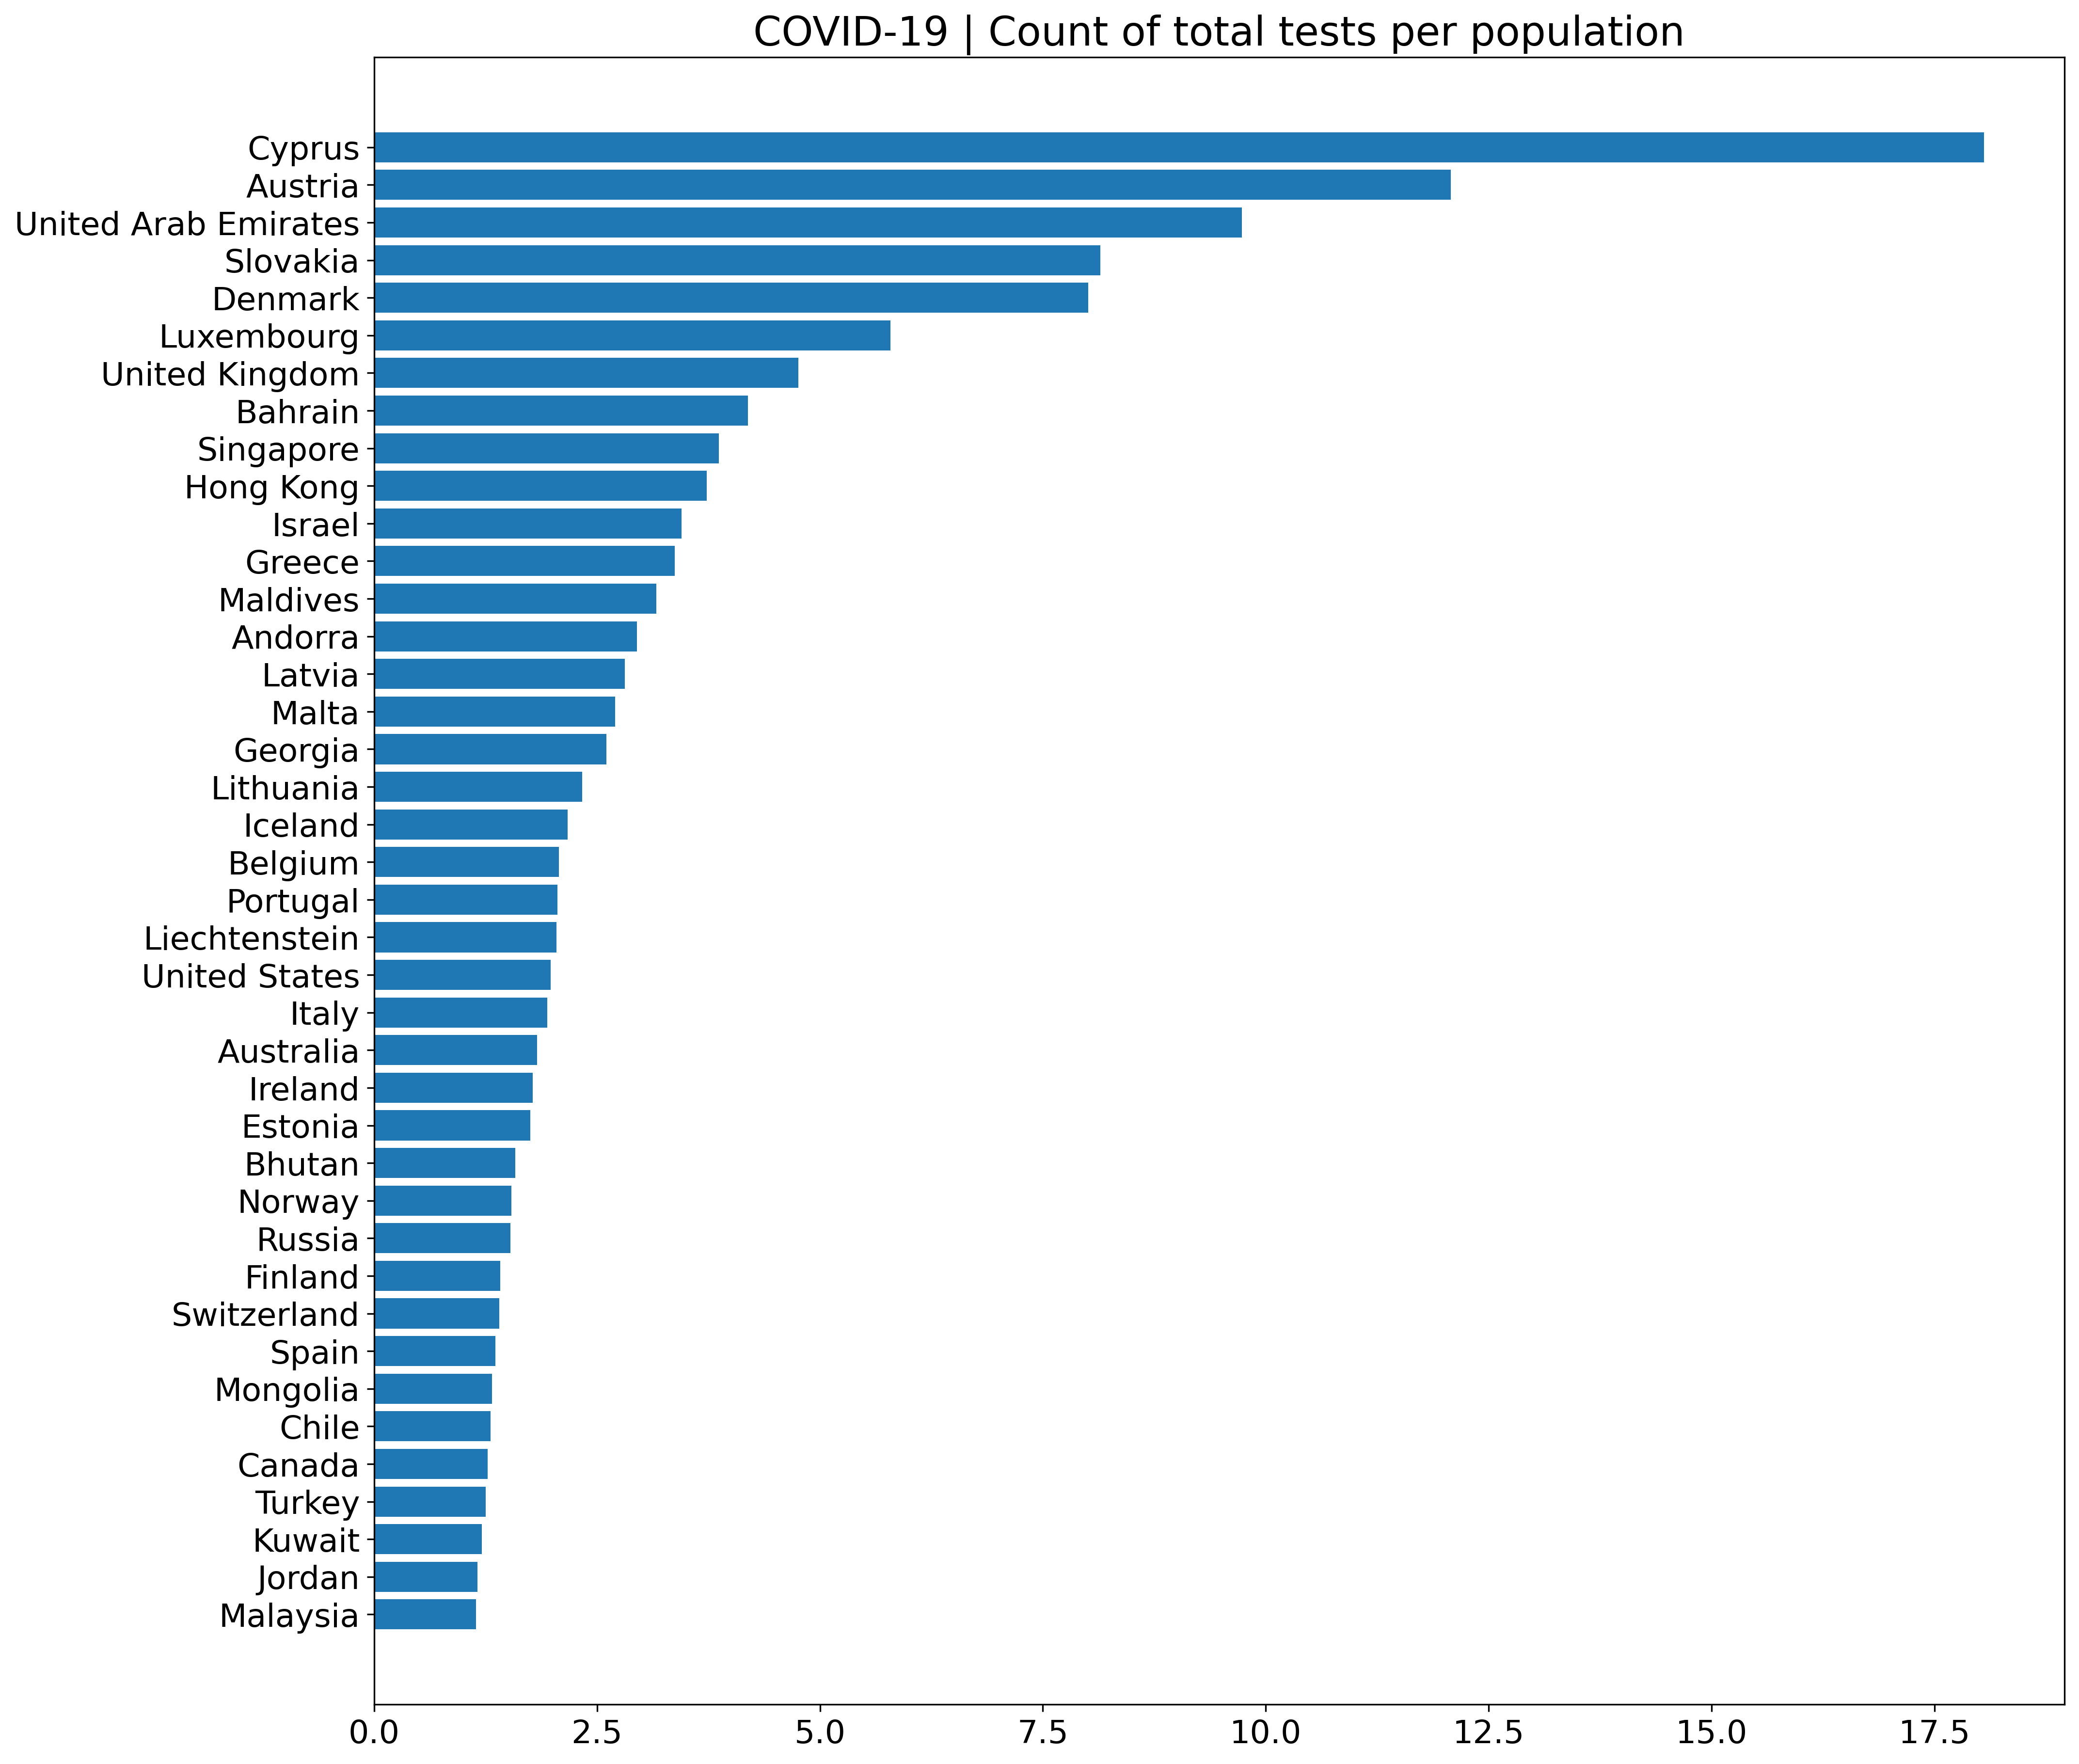

In [21]:
#-----------------------------------------------------
#Feel free to choose any of the following column names
#-----------------------------------------------------
this_col = 'total_tests_per_population'
#this_col = 'total_cases_per_population'
#this_col = 'total_deaths_per_population'
#this_col = 'total_vaccinations_per_population'
#this_col = 'people_vaccinated_per_population'
#this_col = 'people_fully_vaccinated_per_population'
#this_col = 'total_boosters_per_population'
#this_col = 'total_tests'
#this_col = 'total_cases'
#this_col = 'total_deaths'
#this_col = 'total_vaccinations'
#this_col = 'people_vaccinated'
#this_col = 'people_fully_vaccinated'
#this_col = 'total_boosters'


this_df_sorted = df_latest[[this_col]].sort_values(this_col, ascending=False).iloc[:40]
#Feel free to comment the following line to see its effects
this_df_sorted = this_df_sorted.iloc[::-1]#reversing the order of dataframe

fig, ax = plt.subplots(1,1, figsize=(15,15), facecolor=(1, 1, 1), dpi=300)
ax. barh(list(this_df_sorted.index), this_df_sorted[this_col])

ax.set_title(f"COVID-19 | Count of {this_col.replace('_', ' ')}", fontsize=20, loc='center');
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.offsetText.set_fontsize(16)
#ax.set_xscale('log')
#ax.set_xlim(1e7,)

plt.savefig(f'Count of {this_col}.png', bbox_inches='tight')

And, here is how the stats of **_total tests_** look like (note the log-scale for the x-axis for more clarity):

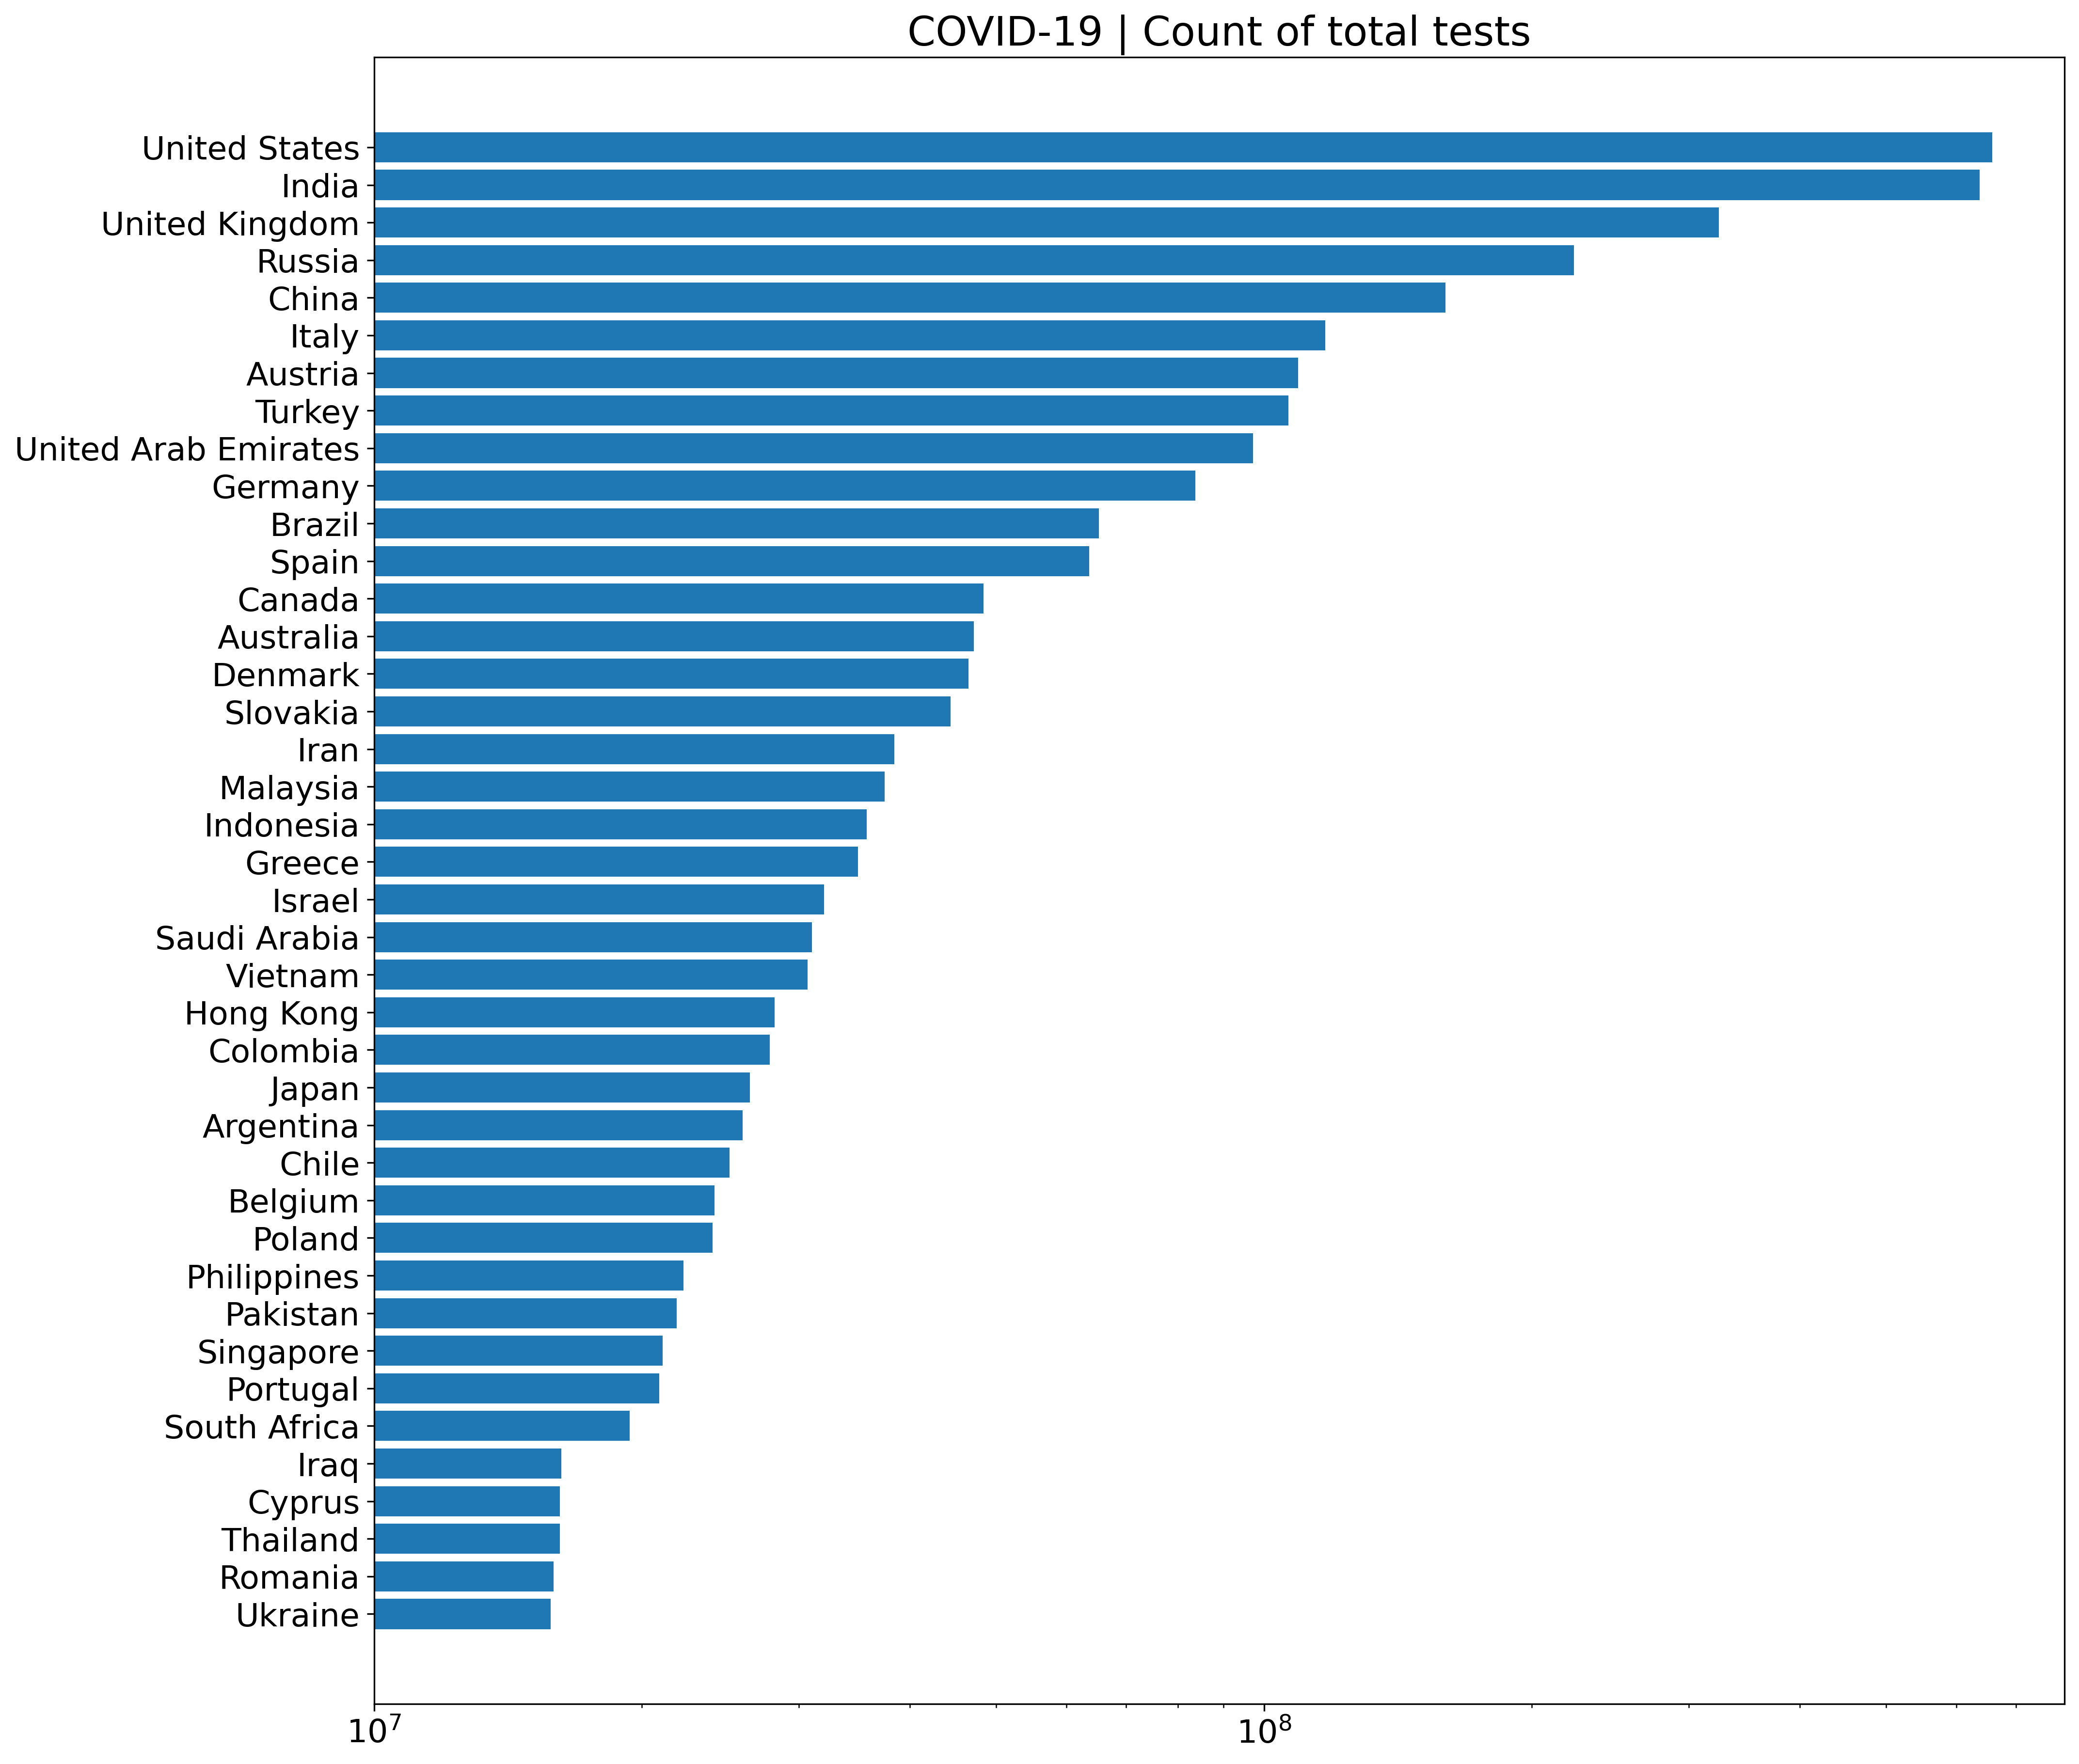

In [22]:
#-----------------------------------------------------
#Feel free to choose any of the following column names
#-----------------------------------------------------
#this_col = 'total_tests_per_population'
#this_col = 'total_cases_per_population'
#this_col = 'total_deaths_per_population'
#this_col = 'total_vaccinations_per_population'
#this_col = 'people_vaccinated_per_population'
#this_col = 'people_fully_vaccinated_per_population'
#this_col = 'total_boosters_per_population'
this_col = 'total_tests'
#this_col = 'total_cases'
#this_col = 'total_deaths'
#this_col = 'total_vaccinations'
#this_col = 'people_vaccinated'
#this_col = 'people_fully_vaccinated'
#this_col = 'total_boosters'


this_df_sorted = df_latest[[this_col]].sort_values(this_col, ascending=False).iloc[:40]
#Feel free to comment the following line to see its effects
this_df_sorted = this_df_sorted.iloc[::-1]#reversing the order of dataframe

fig, ax = plt.subplots(1,1, figsize=(15,15), facecolor=(1, 1, 1), dpi=300)
ax. barh(list(this_df_sorted.index), this_df_sorted[this_col])

ax.set_title(f"COVID-19 | Count of {this_col.replace('_', ' ')}", fontsize=20, loc='center');
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.offsetText.set_fontsize(16)
ax.set_xscale('log')
ax.set_xlim(1e7,)

plt.savefig(f'Count of {this_col}.png', bbox_inches='tight')

There are so many more charts of different types to use for data visualization. Now that we have become more familiar with pandas and its helpful capabilities, we are ready to proceed with more advanced and insightful data visualization techniques. In the following parts, we will try to gradually use more tools provided by Python and matplotlib for the purpose of data visualization to obtain deeper insight into the COVID-19 dataset.

# Final remarks

Hopefully, this tutorial was able to help you use Python, Matplotlib, pandas, dataframe, and data visualization in future to get more insight into your own dataset. The process of development of this set of tutorials is ongoing at the time of writing. To learn more, you can check out to see if the next parts are available online.